. Kelly’s Ice Cream Shop Discount Analysis

how discounts affects sales at an ice icream shop named kelly

In [10]:
import pandas as pd
a=pd.read_csv('E:/PYTHON/kellys_icecream_dataset.csv')
print(a)

    customer_id  transaction_id  amount
0          1001          339473      89
1          1002          359433       5
2          1003           43176      52
3          1004           27169      19
4          1001          530588       4
..          ...             ...     ...
95         1001          900073      19
96         1005          900074      58
97         1004          900075      65
98         1005          900076      43
99         1003          900077      45

[100 rows x 3 columns]


In [11]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     100 non-null    int64
 1   transaction_id  100 non-null    int64
 2   amount          100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


Display the first 10 rows of data.

In [ ]:
a.head(10)
print(a.head(10))


   customer_id  transaction_id  amount
0         1001          339473      89
1         1002          359433       5
2         1003           43176      52
3         1004           27169      19
4         1001          530588       4
5         1004          528902      78
6         1005          584167      72
7         1003           55479      45
8         1005          500607      98
9         1004          544617      65


Show the shape, column names, and data types.

In [ ]:
print(a.shape)
print('\n')
print(a.columns)
print('\n')
print(a.dtypes)

(100, 3)


Index(['customer_id', 'transaction_id', 'amount'], dtype='object')


customer_id       int64
transaction_id    int64
amount            int64
dtype: object


Check for missing values and duplicates.

In [ ]:
print(a.isnull().sum())

customer_id       0
transaction_id    0
amount            0
dtype: int64


In [ ]:
print(a.duplicated().sum())

0


In [ ]:
Use .describe() to get summary statistics for amount.

In [ ]:
a.describe()

,customer_id,transaction_id,amount
count,100.000000,100.000000,100.000000
mean,1003.110000,781349.020000,54.850000
std,1.516875,240661.145129,27.635205
min,1001.000000,27169.000000,4.000000
25%,1002.000000,900002.750000,39.000000
50%,1003.000000,900027.500000,52.000000
75%,1005.000000,900052.250000,78.000000
max,1005.000000,900077.000000,98.000000


In [ ]:
Part 2 – EDA (Exploratory Data Analysis)

Count the total number of transactions per customer

In [ ]:
transaction=a.groupby("customer_id")["transaction_id"].count().reset_index()
print(transaction)

   customer_id  transaction_id
0         1001              22
1         1002              17
2         1003              15
3         1004              20
4         1005              26


Find the 3rd transaction for each customer based on transaction_id ordering.

In [ ]:
a_sort=a.sort_values(["customer_id", "transaction_id"])
print(a_sort)
print('\n')
third_transaction=a_sort.groupby("customer_id").nth(2)
print(third_transaction)

    customer_id  transaction_id  amount  discount_amount  transaction_number
13         1001          225602      19               81                   1
0          1001          339473      89               11                   2
10         1001          374711      94                6                   3
17         1001          445346      92                8                   4
4          1001          530588       4               96                   5
..          ...             ...     ...              ...                 ...
77         1005          900055      78               22                  22
84         1005          900062      43               57                  23
93         1005          900071      43               57                  24
96         1005          900074      58               42                  25
98         1005          900076      43               57                  26

[100 rows x 5 columns]


    customer_id  transaction_id  amount  discount_

Identify customers who received the 33% discount.

In [ ]:
a['original_price']=100
a['discount']=a['original_price']-a['amount']
discount=a[a['discount']==33]

print(discount)

Empty DataFrame
Columns: [customer_id, transaction_id, amount, original_price, discount]
Index: []


Plot a histogram of original purchase amounts for 3rd transactions.

    customer_id  transaction_id  amount
9          1004          544617      65
10         1001          374711      94
12         1005          412764      43
15         1002          415562      50
20         1003          102487      39


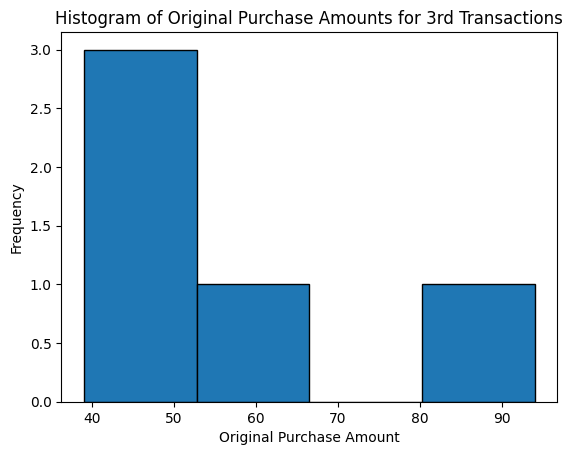

In [12]:
import matplotlib.pyplot as plt

third_transactions = a.groupby('customer_id').nth(2)
print(third_transactions)

plt.hist(third_transactions['amount'], bins=4, edgecolor='black')

plt.xlabel('Original Purchase Amount')

plt.ylabel('Frequency')

plt.title('Histogram of Original Purchase Amounts for 3rd Transactions')
plt.show()


Plot a histogram of discounted amounts for 3rd transactions.

    customer_id  transaction_id  amount  discount_amount
13         1001          225602      19               81
0          1001          339473      89               11
10         1001          374711      94                6
17         1001          445346      92                8
4          1001          530588       4               96
..          ...             ...     ...              ...
77         1005          900055      78               22
84         1005          900062      43               57
93         1005          900071      43               57
96         1005          900074      58               42
98         1005          900076      43               57

[100 rows x 4 columns]
    customer_id  transaction_id  amount  discount_amount  transaction_number
13         1001          225602      19               81                   1
0          1001          339473      89               11                   2
10         1001          374711      94                6     

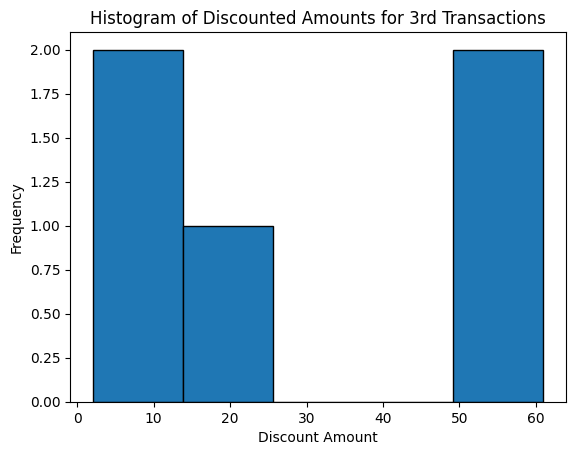

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

a=pd.read_csv("/content/kellys_icecream_dataset.csv")
a['discount_amount'] = 100 -a['amount']

a= a.sort_values(['customer_id', 'transaction_id'])
print(a.sort_values(['customer_id', 'transaction_id']))

a['transaction_number'] = a.groupby('customer_id').cumcount() + 1
print(a)

third_transactions = a[a['transaction_number'] == 3]
print(third_transactions)


plt.hist(third_transactions['discount_amount'], bins=5, edgecolor='black')
plt.xlabel('Discount Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Discounted Amounts for 3rd Transactions')
plt.show()

Part 3 – Statistics

Calculate the average amount for all transactions.

In [ ]:
avg=a["amount"].mean()
print(avg)

54.85


Calculate the average discounted_amount for 3rd transactions.


In [ ]:
avg= third_transactions['discount_amount'].mean()
print(avg)


28.2


Probability: Pick a random transaction — what is the probability that it is a discounted 3rd purchase?




In [ ]:
pro=len(a[(a['transaction_number'] == 3) & (a['discount_amount'] > 0)]) / len(a)
print(pro)


0.05


In [ ]:
Part 4 – Linear Algebra & NumPy

Represent amount as a NumPy array.

In [ ]:
import numpy as np
a=pd.read_csv("/content/kellys_icecream_dataset.csv")
amount=a["amount"].to_numpy()
print(amount)


[89  5 52 19  4 78 72 45 98 65 94 42 43 19 55 50 78 92 30 91 39 58 78 72
 58 43 78  4 39 30 52 94 43 43 39 94 50 78 30 52 30 50 19 78 78 55 19 89
 45 91 45 92  5 72 19 55 52 19 78 98 42  5 78 45 89 50 98 45 78 94 89 43
 43 39 55 55 78 78 91 89 19 92 92 65 43 89 19  4 39 30  5 92 50 43  5 19
 58 65 43 45]


Create a discount vector (0.33 applied only to 3rd purchases, else 0).

In [ ]:
import pandas as pd
a=a.sort_values(['customer_id', 'transaction_id'])

a['transaction_number'] =a.groupby('customer_id').cumcount() + 1

a['discount_vector'] = (a['transaction_number'] == 3) * 0.33

print(a[['customer_id', 'transaction_number', 'discount_vector']])




    customer_id  transaction_number  discount_vector
13         1001                   1             0.00
0          1001                   2             0.00
10         1001                   3             0.33
17         1001                   4             0.00
4          1001                   5             0.00
..          ...                 ...              ...
77         1005                  22             0.00
84         1005                  23             0.00
93         1005                  24             0.00
96         1005                  25             0.00
98         1005                  26             0.00

[100 rows x 3 columns]


Perform element-wise multiplication to compute discounts.

In [ ]:
import pandas as pd
a= a.sort_values(['customer_id', 'transaction_id'])
a['transaction_number'] = a.groupby('customer_id').cumcount() + 1

a['discount_amount'] = a['amount'] * a['discount_vector']

print(a[['customer_id', 'transaction_number', 'amount', 'discount_vector', 'discount_amount']])


    customer_id  transaction_number  amount  discount_vector  discount_amount
13         1001                   1      19             0.00             0.00
0          1001                   2      89             0.00             0.00
10         1001                   3      94             0.33            31.02
17         1001                   4      92             0.00             0.00
4          1001                   5       4             0.00             0.00
..          ...                 ...     ...              ...              ...
77         1005                  22      78             0.00             0.00
84         1005                  23      43             0.00             0.00
93         1005                  24      43             0.00             0.00
96         1005                  25      58             0.00             0.00
98         1005                  26      43             0.00             0.00

[100 rows x 5 columns]


Compute the total discount given across all customers (dot product).

In [ ]:
import numpy as np
total_discount = a['amount'].dot(a['discount_vector'])
print(total_discount)

118.47000000000003


Perform weighted sum using [0.67, 0.33] for non-discounted and discounted transactions.

In [ ]:
import pandas as pd

a['transaction_number'] =a.groupby('customer_id').cumcount() + 1
print(a)

# Assign weights: 0.33 if 3rd transaction, else 0.67
weights =a['transaction_number'].apply(lambda x: 0.33 if x == 3 else 0.67)
print(weights)
print('\n')


weighted_sum = (a['amount'] * weights).sum()

print("Weighted sum:", weighted_sum)

    customer_id  transaction_id  amount  discount_amount  transaction_number  \
13         1001          225602      19             0.00                   1   
0          1001          339473      89             0.00                   2   
10         1001          374711      94            31.02                   3   
17         1001          445346      92             0.00                   4   
4          1001          530588       4             0.00                   5   
..          ...             ...     ...              ...                 ...   
77         1005          900055      78             0.00                  22   
84         1005          900062      43             0.00                  23   
93         1005          900071      43             0.00                  24   
96         1005          900074      58             0.00                  25   
98         1005          900076      43             0.00                  26   

    discount_vector  
13             0.

Part 5 – Calculus

 Find the derivative of Discounted_Amount with respect to Amount (use SymPy).


In [ ]:
import sympy as sp

amount, discount_vector = sp.symbols('amount discount_vector')

discount_amount = amount * (1 - discount_vector)
print(discount_amount)

derivative = sp.diff(discount_amount, amount)
print(derivative)



amount*(1 - discount_vector)
1 - discount_vector


Interpret the derivative in the context of the problem.

In [ ]:
import sympy as sp

amount, discount_rate = sp.symbols('amount discount_rate')

discounted_amount = amount * (1 - discount_rate)
print(discount_amount)

derivative_amount = sp.diff(discounted_amount, amount)
print(derivative_amount)

# Derivative of discounted amount w.r.t. discount rate
derivative_discount_rate = sp.diff(discounted_amount, discount_rate)
print(derivative_discount_rate)



amount*(1 - discount_vector)
1 - discount_rate
-amount


Part 6 – Feature Engineering

Create a new column Transaction_Rank (purchase number per customer).

In [ ]:
import pandas as pd
a=pd.read_csv('/content/kellys_icecream_dataset.csv')
print(a)



    customer_id  transaction_id  amount
0          1001          339473      89
1          1002          359433       5
2          1003           43176      52
3          1004           27169      19
4          1001          530588       4
..          ...             ...     ...
95         1001          900073      19
96         1005          900074      58
97         1004          900075      65
98         1005          900076      43
99         1003          900077      45

[100 rows x 3 columns]


In [ ]:
a=a.sort_values(['customer_id', 'transaction_id'])
print(a)
a['Transaction_Rank'] = a.groupby('customer_id').cumcount() + 1
print(a)

    customer_id  transaction_id  amount  Transaction_Rank
13         1001          225602      19                 1
0          1001          339473      89                 2
10         1001          374711      94                 3
17         1001          445346      92                 4
4          1001          530588       4                 5
..          ...             ...     ...               ...
77         1005          900055      78                22
84         1005          900062      43                23
93         1005          900071      43                24
96         1005          900074      58                25
98         1005          900076      43                26

[100 rows x 4 columns]
    customer_id  transaction_id  amount  Transaction_Rank
13         1001          225602      19                 1
0          1001          339473      89                 2
10         1001          374711      94                 3
17         1001          445346      92         

Create Discount_Applied column (1 if it’s the 3rd purchase, else 0).


In [ ]:
a['Discount_Applied'] = (a['Transaction_Rank'] == 3).astype(int)
print(a)

    customer_id  transaction_id  amount  Transaction_Rank  Discount_Applied
13         1001          225602      19                 1                 0
0          1001          339473      89                 2                 0
10         1001          374711      94                 3                 1
17         1001          445346      92                 4                 0
4          1001          530588       4                 5                 0
..          ...             ...     ...               ...               ...
77         1005          900055      78                22                 0
84         1005          900062      43                23                 0
93         1005          900071      43                24                 0
96         1005          900074      58                25                 0
98         1005          900076      43                26                 0

[100 rows x 5 columns]


Create Discounted_Amount column (apply 33% discount for 3rd purchases).

In [ ]:
a['Discounted_Amount'] =a['amount'] * (1 - 0.33 * (a['Transaction_Rank'] == 3))
print(a)

    customer_id  transaction_id  amount  Transaction_Rank  Discount_Applied  \
13         1001          225602      19                 1                 0   
0          1001          339473      89                 2                 0   
10         1001          374711      94                 3                 1   
17         1001          445346      92                 4                 0   
4          1001          530588       4                 5                 0   
..          ...             ...     ...               ...               ...   
77         1005          900055      78                22                 0   
84         1005          900062      43                23                 0   
93         1005          900071      43                24                 0   
96         1005          900074      58                25                 0   
98         1005          900076      43                26                 0   

    Discounted_Amount  
13              19.00  
0  

df['Transaction_Rank'] == 3) → gives True for 3rd purchases, else False.

0.33 * (df['Transaction_Rank'] == 3) → makes it 0.33 for 3rd purchases, else 0.

1 - ... → adjusts the multiplier.

Multiplying by df['amount'] gives the discounted price only for 3rd transactions
For 3rd purchase: 1 - 0.33 * 1 = 0.67 (you pay 67% of the original amount).

For others: 1 - 0.33 * 0 = 1 (you pay 100% of the original amount).

In [ ]:
Create Savings column = amount - discounted_amount.

In [ ]:
a['Savings'] =a['amount'] -a['Discounted_Amount']
print(a)

    customer_id  transaction_id  amount  Transaction_Rank  Discount_Applied  \
13         1001          225602      19                 1                 0   
0          1001          339473      89                 2                 0   
10         1001          374711      94                 3                 1   
17         1001          445346      92                 4                 0   
4          1001          530588       4                 5                 0   
..          ...             ...     ...               ...               ...   
77         1005          900055      78                22                 0   
84         1005          900062      43                23                 0   
93         1005          900071      43                24                 0   
96         1005          900074      58                25                 0   
98         1005          900076      43                26                 0   

    Discounted_Amount  Savings  
13              19

In [ ]:
Part 7 – SQL Simulation in Pandas

Select only rows where Discount_Applied = 1.

In [ ]:
discounted_rows = a[a['Discount_Applied'] == 1]
print(discounted_rows)


    customer_id  transaction_id  amount  Transaction_Rank  Discount_Applied  \
10         1001          374711      94                 3                 1   
15         1002          415562      50                 3                 1   
20         1003          102487      39                 3                 1   
5          1004          528902      78                 3                 1   
8          1005          500607      98                 3                 1   

    Discounted_Amount  Savings  
10              62.98    31.02  
15              33.50    16.50  
20              26.13    12.87  
5               52.26    25.74  
8               65.66    32.34  


Output columns: customer_id, transaction_id, amount, discounted_amount.


In [ ]:
discounted_rows = a[a['Discount_Applied'] == 1][['customer_id', 'transaction_id', 'amount', 'Discounted_Amount']]
print(discounted_rows)

    customer_id  transaction_id  amount  Discounted_Amount
10         1001          374711      94              62.98
15         1002          415562      50              33.50
20         1003          102487      39              26.13
5          1004          528902      78              52.26
8          1005          500607      98              65.66




Sort by customer_id ascending

In [ ]:
discounted_rows = a[a['Discount_Applied'] == 1][['customer_id', 'transaction_id', 'amount', 'Discounted_Amount']].sort_values(by='customer_id', ascending=True)

print(discounted_rows)



    customer_id  transaction_id  amount  Discounted_Amount
10         1001          374711      94              62.98
15         1002          415562      50              33.50
20         1003          102487      39              26.13
5          1004          528902      78              52.26
8          1005          500607      98              65.66


Part 8 – Insights


Which customer received the largest discount?


In [ ]:
largest = a.loc[a['Savings'].idxmax(), 'customer_id']
print(largest)


1005


What is the total amount Kelly discounted across all customers?


In [ ]:
total_discount =a['Savings'].sum()
print( total_discount)


118.47000000000003


What is the average saving per customer?

In [ ]:
avg = a.groupby('customer_id')['Savings'].sum().mean()
print(avg)


23.694000000000006


Which customers spent the most after the discount?

In [ ]:
top = (a.groupby('customer_id')['Discounted_Amount'].sum().sort_values(ascending=False))
print(top)


customer_id
1005    1662.66
1001    1426.98
1004    1124.26
1003     660.13
1002     492.50
Name: Discounted_Amount, dtype: float64


extra analysis

In [ ]:
Which customer made the highest total purchases before discounts?

In [ ]:
import pandas as pd

# Load the data and create necessary columns
a = pd.read_csv('/content/kellys_icecream_dataset.csv')
a['discount_amount'] = 100 - a['amount'] # Assuming original price is 100 as in previous cells

a["before_discount"] = a["amount"] + a["discount_amount"]

totals = a.groupby("customer_id")["before_discount"].sum()
top_customer = totals.idxmax()
top_amount = totals.max()

print(f"The customer highest total purchases before discounts is customer ID {top_customer} with a total amount of {top_amount}.")

The customer highest total purchases before discounts is customer ID 1005 with a total amount of 2600.
